## Import Librairies

In [1]:
import numpy as np
from StochasticProcess import StochasticProcess, BlackScholesProcess
from RegressionBasis import ChebyshevBasis, LaguerreBasis, PolynomialBasis, HermiteBasis, \
    MonomialBasis3D, PolynomialHortoBasis3D
from Option import *
from LongstaffSchwartz import LongstaffSchwartz
import time

In [8]:
def test_regression_basis(bases=[], N=1000, degree=5):
    
    # Define the number of dimensions (number of assets)
    
    dim = 3

    # Define the risk-free rate for each dimension (asset)
    r = np.array([0.05, 0.06, 0.04])

    # Define the volatility for each dimension (asset)
    vol = np.array([0.1, 0.2, 0.15])

    # Define the correlation matrix
    corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
    ])

    # Define the drift for each dimension (asset)
    mu = np.array([0.06, 0.08, 0.07])

    # Create the Black-Scholes process
    process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)

    # Define the initial asset prices
    S0 = np.array([100, 100, 100])

    # Define the number of paths and time steps
    N = 1000
    m = 50

    # Define the time horizon
    T = 1

    # Generate paths
    S = process.generate_paths(S0, N, m, T)


    # Dictionnaire pour stocker les temps de calcul pour chaque base
    time_data = {}
    
    # basis
    bases = [ChebyshevBasis(degree), LaguerreBasis(degree), PolynomialBasis(degree), HermiteBasis(degree),
             MonomialBasis3D(degree), PolynomialHortoBasis3D(2, LaguerreBasis(degree))]

    for basis in bases:
        # Création de l'algorithme de Longstaff-Schwartz avec la base de régression spécifiée
        K = 100

        option = MaxPutOption(K, T, S0)
        
        basis = ChebyshevBasis(degree)
        ls = LongstaffSchwartz(option, basis, N)

        price = ls.price(option, process, m)

        # Mesure du temps de calcul
        start_time = time.time()
        price, _, _, _, _ = ls.price(option, process, m)
        end_time = time.time()

        # Ajout du temps de calcul à la liste
        time_data[basis.basis_name] = end_time - start_time

        print(f'Le prix de l\'option MaxPut avec la base de régression {basis.basis_name} '
              f'pour N={N} et degré={degree} est : {price:.4f}')
        print(f'Temps de calcul : {end_time - start_time:.6f} secondes\n')

    return time_data


if __name__ == '__main__':
    # Tester avec différentes bases de régression et degré fixé
    
    N = 10000
    degree = 2

    # Résultats des tests
    time_data = test_regression_basis(bases=[], N=N, degree=degree)

    # Trouver la base la plus rapide
    fastest_basis = min(time_data, key=time_data.get)
    print(f'La base la plus rapide est : {fastest_basis}, temps de calcul : {time_data[fastest_basis]:.6f} secondes')


Le prix de l'option MaxPut avec la base de régression ChebyshevBasis pour N=1000 et degré=2 est : 0.7261
Temps de calcul : 0.026472 secondes

Le prix de l'option MaxPut avec la base de régression ChebyshevBasis pour N=1000 et degré=2 est : 0.7575
Temps de calcul : 0.015656 secondes

Le prix de l'option MaxPut avec la base de régression ChebyshevBasis pour N=1000 et degré=2 est : 0.8322
Temps de calcul : 0.031275 secondes

Le prix de l'option MaxPut avec la base de régression ChebyshevBasis pour N=1000 et degré=2 est : 0.7760
Temps de calcul : 0.031243 secondes

Le prix de l'option MaxPut avec la base de régression ChebyshevBasis pour N=1000 et degré=2 est : 0.6279
Temps de calcul : 0.029314 secondes

Le prix de l'option MaxPut avec la base de régression ChebyshevBasis pour N=1000 et degré=2 est : 0.7819
Temps de calcul : 0.013262 secondes

La base la plus rapide est : ChebyshevBasis, temps de calcul : 0.013262 secondes


Le prix de l'option MaxPut pour N=5 et degré=3 est : 0.0000
Temps de calcul : 0.438252 secondes

Le prix de l'option MaxPut pour N=6 et degré=3 est : 0.9754
Temps de calcul : 0.008542 secondes

Le prix de l'option MaxPut pour N=7 et degré=3 est : 0.0000
Temps de calcul : 0.003989 secondes

Le prix de l'option MaxPut pour N=8 et degré=3 est : 0.7050
Temps de calcul : 0.005984 secondes

Le prix de l'option MaxPut pour N=9 et degré=3 est : 0.0000
Temps de calcul : 0.002991 secondes

Le prix de l'option MaxPut pour N=10 et degré=3 est : 0.9012
Temps de calcul : 0.002992 secondes

Le prix de l'option MaxPut pour N=11 et degré=3 est : 0.0000
Temps de calcul : 0.002992 secondes

Le prix de l'option MaxPut pour N=12 et degré=3 est : 0.0000
Temps de calcul : 0.001842 secondes

Le prix de l'option MaxPut pour N=13 et degré=3 est : 1.1156
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=14 et degré=3 est : 0.2026
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPu

Le prix de l'option MaxPut pour N=91 et degré=3 est : 0.4070
Temps de calcul : 0.004749 secondes

Le prix de l'option MaxPut pour N=92 et degré=3 est : 0.4227
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=93 et degré=3 est : 0.6640
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=94 et degré=3 est : 0.7449
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=95 et degré=3 est : 0.6649
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=96 et degré=3 est : 0.3307
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=97 et degré=3 est : 0.4326
Temps de calcul : 0.016062 secondes

Le prix de l'option MaxPut pour N=98 et degré=3 est : 0.4491
Temps de calcul : 0.003027 secondes

Le prix de l'option MaxPut pour N=99 et degré=3 est : 0.4811
Temps de calcul : 0.002991 secondes

Le prix de l'option MaxPut pour N=100 et degré=3 est : 0.3007
Temps de calcul : 0.002991 secondes

Le prix de l'option

Le prix de l'option MaxPut pour N=195 et degré=3 est : 0.6266
Temps de calcul : 0.021842 secondes

Le prix de l'option MaxPut pour N=196 et degré=3 est : 0.4530
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=197 et degré=3 est : 0.3528
Temps de calcul : 0.006006 secondes

Le prix de l'option MaxPut pour N=198 et degré=3 est : 0.5972
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=199 et degré=3 est : 0.2668
Temps de calcul : 0.012353 secondes

Le prix de l'option MaxPut pour N=200 et degré=3 est : 0.4568
Temps de calcul : 0.005920 secondes

Le prix de l'option MaxPut pour N=201 et degré=3 est : 0.3898
Temps de calcul : 0.001514 secondes

Le prix de l'option MaxPut pour N=202 et degré=3 est : 0.5312
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=203 et degré=3 est : 0.5352
Temps de calcul : 0.011348 secondes

Le prix de l'option MaxPut pour N=204 et degré=3 est : 0.3092
Temps de calcul : 0.002935 secondes

Le prix de

Le prix de l'option MaxPut pour N=289 et degré=3 est : 0.6767
Temps de calcul : 0.006021 secondes

Le prix de l'option MaxPut pour N=290 et degré=3 est : 0.3949
Temps de calcul : 0.004984 secondes

Le prix de l'option MaxPut pour N=291 et degré=3 est : 0.6598
Temps de calcul : 0.003988 secondes

Le prix de l'option MaxPut pour N=292 et degré=3 est : 0.4595
Temps de calcul : 0.005952 secondes

Le prix de l'option MaxPut pour N=293 et degré=3 est : 0.5410
Temps de calcul : 0.003988 secondes

Le prix de l'option MaxPut pour N=294 et degré=3 est : 0.4242
Temps de calcul : 0.004987 secondes

Le prix de l'option MaxPut pour N=295 et degré=3 est : 0.5326
Temps de calcul : 0.004022 secondes

Le prix de l'option MaxPut pour N=296 et degré=3 est : 0.3792
Temps de calcul : 0.004953 secondes

Le prix de l'option MaxPut pour N=297 et degré=3 est : 0.4792
Temps de calcul : 0.004987 secondes

Le prix de l'option MaxPut pour N=298 et degré=3 est : 0.4338
Temps de calcul : 0.002506 secondes

Le prix de

Le prix de l'option MaxPut pour N=405 et degré=3 est : 0.4787
Temps de calcul : 0.015622 secondes

Le prix de l'option MaxPut pour N=406 et degré=3 est : 0.5501
Temps de calcul : 0.011333 secondes

Le prix de l'option MaxPut pour N=407 et degré=3 est : 0.5299
Temps de calcul : 0.008255 secondes

Le prix de l'option MaxPut pour N=408 et degré=3 est : 0.6031
Temps de calcul : 0.006017 secondes

Le prix de l'option MaxPut pour N=409 et degré=3 est : 0.4666
Temps de calcul : 0.005988 secondes

Le prix de l'option MaxPut pour N=410 et degré=3 est : 0.5811
Temps de calcul : 0.005005 secondes

Le prix de l'option MaxPut pour N=411 et degré=3 est : 0.6576
Temps de calcul : 0.005927 secondes

Le prix de l'option MaxPut pour N=412 et degré=3 est : 0.4133
Temps de calcul : 0.006023 secondes

Le prix de l'option MaxPut pour N=413 et degré=3 est : 0.4379
Temps de calcul : 0.005985 secondes

Le prix de l'option MaxPut pour N=414 et degré=3 est : 0.2960
Temps de calcul : 0.005985 secondes

Le prix de

Le prix de l'option MaxPut pour N=495 et degré=3 est : 0.3486
Temps de calcul : 0.021086 secondes

Le prix de l'option MaxPut pour N=496 et degré=3 est : 0.3996
Temps de calcul : 0.008176 secondes

Le prix de l'option MaxPut pour N=497 et degré=3 est : 0.4957
Temps de calcul : 0.007981 secondes

Le prix de l'option MaxPut pour N=498 et degré=3 est : 0.4781
Temps de calcul : 0.008939 secondes

Le prix de l'option MaxPut pour N=499 et degré=3 est : 0.4421
Temps de calcul : 0.009014 secondes

Le prix de l'option MaxPut pour N=500 et degré=3 est : 0.3771
Temps de calcul : 0.007981 secondes

Le prix de l'option MaxPut pour N=501 et degré=3 est : 0.5164
Temps de calcul : 0.003920 secondes

Le prix de l'option MaxPut pour N=502 et degré=3 est : 0.3985
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=503 et degré=3 est : 0.5041
Temps de calcul : 0.015666 secondes

Le prix de l'option MaxPut pour N=504 et degré=3 est : 0.4303
Temps de calcul : 0.000000 secondes

Le prix de

Le prix de l'option MaxPut pour N=592 et degré=3 est : 0.3664
Temps de calcul : 0.021104 secondes

Le prix de l'option MaxPut pour N=593 et degré=3 est : 0.4759
Temps de calcul : 0.003751 secondes

Le prix de l'option MaxPut pour N=594 et degré=3 est : 0.5122
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=595 et degré=3 est : 0.5975
Temps de calcul : 0.024405 secondes

Le prix de l'option MaxPut pour N=596 et degré=3 est : 0.4121
Temps de calcul : 0.008967 secondes

Le prix de l'option MaxPut pour N=597 et degré=3 est : 0.4212
Temps de calcul : 0.008982 secondes

Le prix de l'option MaxPut pour N=598 et degré=3 est : 0.4948
Temps de calcul : 0.009967 secondes

Le prix de l'option MaxPut pour N=599 et degré=3 est : 0.5301
Temps de calcul : 0.008983 secondes

Le prix de l'option MaxPut pour N=600 et degré=3 est : 0.5004
Temps de calcul : 0.002038 secondes

Le prix de l'option MaxPut pour N=601 et degré=3 est : 0.4300
Temps de calcul : 0.015664 secondes

Le prix de

Le prix de l'option MaxPut pour N=679 et degré=3 est : 0.6268
Temps de calcul : 0.015611 secondes

Le prix de l'option MaxPut pour N=680 et degré=3 est : 0.4475
Temps de calcul : 0.008688 secondes

Le prix de l'option MaxPut pour N=681 et degré=3 est : 0.3458
Temps de calcul : 0.015505 secondes

Le prix de l'option MaxPut pour N=682 et degré=3 est : 0.4318
Temps de calcul : 0.010974 secondes

Le prix de l'option MaxPut pour N=683 et degré=3 est : 0.5528
Temps de calcul : 0.009974 secondes

Le prix de l'option MaxPut pour N=684 et degré=3 est : 0.5249
Temps de calcul : 0.011930 secondes

Le prix de l'option MaxPut pour N=685 et degré=3 est : 0.5253
Temps de calcul : 0.001072 secondes

Le prix de l'option MaxPut pour N=686 et degré=3 est : 0.4646
Temps de calcul : 0.015673 secondes

Le prix de l'option MaxPut pour N=687 et degré=3 est : 0.4608
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=688 et degré=3 est : 0.3657
Temps de calcul : 0.015613 secondes

Le prix de

Le prix de l'option MaxPut pour N=773 et degré=3 est : 0.4099
Temps de calcul : 0.027474 secondes

Le prix de l'option MaxPut pour N=774 et degré=3 est : 0.4191
Temps de calcul : 0.012969 secondes

Le prix de l'option MaxPut pour N=775 et degré=3 est : 0.3890
Temps de calcul : 0.014921 secondes

Le prix de l'option MaxPut pour N=776 et degré=3 est : 0.5094
Temps de calcul : 0.011707 secondes

Le prix de l'option MaxPut pour N=777 et degré=3 est : 0.6440
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=778 et degré=3 est : 0.4306
Temps de calcul : 0.015656 secondes

Le prix de l'option MaxPut pour N=779 et degré=3 est : 0.4642
Temps de calcul : 0.015626 secondes

Le prix de l'option MaxPut pour N=780 et degré=3 est : 0.5486
Temps de calcul : 0.015621 secondes

Le prix de l'option MaxPut pour N=781 et degré=3 est : 0.4869
Temps de calcul : 0.015582 secondes

Le prix de l'option MaxPut pour N=782 et degré=3 est : 0.4991
Temps de calcul : 0.000000 secondes

Le prix de

Le prix de l'option MaxPut pour N=857 et degré=3 est : 0.5942
Temps de calcul : 0.022465 secondes

Le prix de l'option MaxPut pour N=858 et degré=3 est : 0.3605
Temps de calcul : 0.012969 secondes

Le prix de l'option MaxPut pour N=859 et degré=3 est : 0.3511
Temps de calcul : 0.014028 secondes

Le prix de l'option MaxPut pour N=860 et degré=3 est : 0.3690
Temps de calcul : 0.012965 secondes

Le prix de l'option MaxPut pour N=861 et degré=3 est : 0.5918
Temps de calcul : 0.012965 secondes

Le prix de l'option MaxPut pour N=862 et degré=3 est : 0.3882
Temps de calcul : 0.012044 secondes

Le prix de l'option MaxPut pour N=863 et degré=3 est : 0.4147
Temps de calcul : 0.000000 secondes

Le prix de l'option MaxPut pour N=864 et degré=3 est : 0.4963
Temps de calcul : 0.015666 secondes

Le prix de l'option MaxPut pour N=865 et degré=3 est : 0.4785
Temps de calcul : 0.015623 secondes

Le prix de l'option MaxPut pour N=866 et degré=3 est : 0.5521
Temps de calcul : 0.015627 secondes

Le prix de

Le prix de l'option MaxPut pour N=951 et degré=3 est : 0.5087
Temps de calcul : 0.015618 secondes

Le prix de l'option MaxPut pour N=952 et degré=3 est : 0.4049
Temps de calcul : 0.017157 secondes

Le prix de l'option MaxPut pour N=953 et degré=3 est : 0.5064
Temps de calcul : 0.018948 secondes

Le prix de l'option MaxPut pour N=954 et degré=3 est : 0.3196
Temps de calcul : 0.014960 secondes

Le prix de l'option MaxPut pour N=955 et degré=3 est : 0.4003
Temps de calcul : 0.007050 secondes

Le prix de l'option MaxPut pour N=956 et degré=3 est : 0.5309
Temps de calcul : 0.015665 secondes

Le prix de l'option MaxPut pour N=957 et degré=3 est : 0.4991
Temps de calcul : 0.015616 secondes

Le prix de l'option MaxPut pour N=958 et degré=3 est : 0.5828
Temps de calcul : 0.015620 secondes

Le prix de l'option MaxPut pour N=959 et degré=3 est : 0.6144
Temps de calcul : 0.015620 secondes

Le prix de l'option MaxPut pour N=960 et degré=3 est : 0.4222
Temps de calcul : 0.000000 secondes

Le prix de

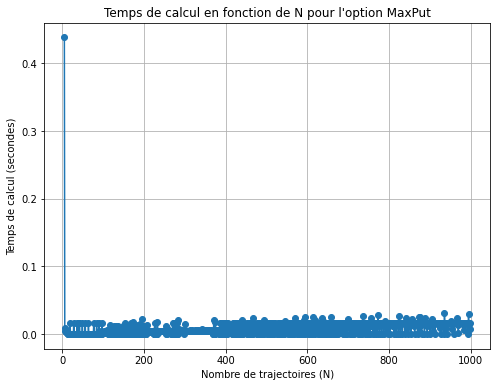

In [22]:
def test_max_put_option_varying_N():
    # Paramètres pour le test
    dim = 3  # Nombre de dimensions (nombre d'actifs)
    r = np.array([0.05, 0.06, 0.04])  # Taux sans risque pour chaque actif
    vol = np.array([0.1, 0.2, 0.15])  # Volatilité pour chaque actif
    corr = np.array([[1.0, 0.2, 0.4], [0.2, 1.0, 0.5], [0.4, 0.5, 1.0]])  # Matrice de corrélation
    mu = np.array([0.06, 0.08, 0.07])  # Dérive pour chaque actif
    process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)  # Processus Black-Scholes

    # Création de l'option MaxPut
    S0 = np.array([100, 100, 100])
    K = 100
    T = 1
    option = MaxPutOption(K, T, S0)

    # Paramètres pour le test
    N_values = [i for i in range(5,1000)]  # Différentes valeurs de N
    m = 50  # Nombre de pas de temps
    degree = 3  # Degré de la base de régression

    # Dictionnaire pour stocker les temps de calcul pour chaque N
    time_data = {}

    for N in N_values:
        # Créer la base de régression polynomiale
        basis = PolynomialBasis(degree)
        ls = LongstaffSchwartz(option, basis, N)

        # Mesure du temps de calcul
        start_time = time.time()
        price, _, _, _, _ = ls.price(option, process, m)
        end_time = time.time()

        # Ajout du temps de calcul à la liste
        time_data[N] = end_time - start_time

        print(f'Le prix de l\'option MaxPut pour N={N} et degré={degree} est : {price:.4f}')
        print(f'Temps de calcul : {end_time - start_time:.6f} secondes\n')

    # Affichage du graphique
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    plt.plot(list(time_data.keys()), list(time_data.values()), marker='o')
    plt.xlabel('Nombre de trajectoires (N)')
    plt.ylabel('Temps de calcul (secondes)')
    plt.title('Temps de calcul en fonction de N pour l\'option MaxPut')
    plt.grid()
    plt.show()


if __name__ == '__main__':
    # Tester l'option MaxPut avec différentes valeurs de N
    test_max_put_option_varying_N()


In [21]:
def test_max_put_option_varying_degree():
    # Paramètres pour le test
    dim = 3  # Nombre de dimensions (nombre d'actifs)
    r = np.array([0.05, 0.06, 0.04])  # Taux sans risque pour chaque actif
    vol = np.array([0.1, 0.2, 0.15])  # Volatilité pour chaque actif
    corr = np.array([[1.0, 0.2, 0.4], [0.2, 1.0, 0.5], [0.4, 0.5, 1.0]])  # Matrice de corrélation
    mu = np.array([0.06, 0.08, 0.07])  # Dérive pour chaque actif
    process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)  # Processus Black-Scholes

    # Création de l'option MaxPut
    S0 = np.array([100, 100, 100])
    K = 100
    T = 1
    option = MaxCallOption(K, T, S0)

    # Paramètres pour le test
    N = 1000  # Nombre de trajectoires
    m = 50  # Nombre de pas de temps
    degree_values = [  i for i in range(0,30,3)]  # Différentes valeurs de degré

    for degree in degree_values:
        # Créer la base de régression polynomiale avec le degré spécifié
        basis = PolynomialBasis(degree)
        ls = LongstaffSchwartz(option, basis, N)

        # Mesure du temps de calcul
        start_time = time.time()
        price, _, _, _, _ = ls.price(option, process, m)
        end_time = time.time()

        print(f'Le prix de l\'option MaxPut avec la base de régression polynomiale '
              f'de degré {degree} pour N={N} est : {price:.4f}')
        print(f'Temps de calcul : {end_time - start_time:.6f} secondes\n')


if __name__ == '__main__':
    # Tester l'option MaxPut avec différentes valeurs de degré de la base de régression
    test_max_put_option_varying_degree()


Le prix de l'option MaxPut avec la base de régression polynomiale de degré 0 pour N=1000 est : 19.9815
Temps de calcul : 0.025169 secondes

Le prix de l'option MaxPut avec la base de régression polynomiale de degré 3 pour N=1000 est : 18.6530
Temps de calcul : 0.027355 secondes

Le prix de l'option MaxPut avec la base de régression polynomiale de degré 6 pour N=1000 est : 19.2556
Temps de calcul : 0.023900 secondes

Le prix de l'option MaxPut avec la base de régression polynomiale de degré 9 pour N=1000 est : 20.3753
Temps de calcul : 0.026698 secondes

Le prix de l'option MaxPut avec la base de régression polynomiale de degré 12 pour N=1000 est : 18.4372
Temps de calcul : 0.031242 secondes

Le prix de l'option MaxPut avec la base de régression polynomiale de degré 15 pour N=1000 est : 19.3906
Temps de calcul : 0.031242 secondes

Le prix de l'option MaxPut avec la base de régression polynomiale de degré 18 pour N=1000 est : 19.5011
Temps de calcul : 0.046869 secondes

Le prix de l'opti

In [3]:
def test_max_option():
    # Paramètres pour le test
    dim = 1  # Nombre de dimensions (nombre d'actifs)
    r = np.array([0.05,])  # Taux sans risque pour chaque actif
    vol = np.array([0.1,])  # Volatilité pour chaque actif
    corr = np.array([1.0])  # Matrice de corrélation
    mu = np.array([0.06])  # Dérive pour chaque actif
    process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)  # Processus Black-Scholes

    # Création de l'option MaxPut
    S0 = np.array([100])
    K = 100
    T = 1
    option = MaxOption(K, T, S0)

    # Paramètres pour le test
    N = 10  # Nombre de trajectoires
    m = 50  # Nombre de pas de temps
    degree_values = [  i for i in range(0,3,3)]  # Différentes valeurs de degré

    for degree in degree_values:
        # Créer la base de régression polynomiale avec le degré spécifié
        basis = PolynomialBasis(degree)
        ls = LongstaffSchwartz(option, basis, N)

        # Mesure du temps de calcul
        start_time = time.time()
        price, _, _, _, _ = ls.price(option, process, m)
        end_time = time.time()

        print(f'Le prix de l\'option MaxPut avec la base de régression polynomiale '
              f'de degré {degree} pour N={N} est : {price:.4f}')
        print(f'Temps de calcul : {end_time - start_time:.6f} secondes\n')


if __name__ == '__main__':
    # Tester l'option MaxPut avec différentes valeurs de degré de la base de régression
    test_max_option()

[[ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]]
[[[100.        ]
  [ 98.12764529]
  [ 98.56743286]
  [ 98.74088085]
  [100.51961509]
  [100.34629474]
  [100.94706923]
  [101.63452816]
  [105.32812321]
  [104.18881356]
  [103.01937007]
  [101.74599942]
  [103.58502524]
  [105.63517979]
  [106.33671793]
  [104.66787024]
  [105.45034323]
  [106.17738286]
  [105.13588826]
  [105.71544587]
  [110.03853906]
  [111.13085377]
  [110.42842973]
  [111.48369615]
  [110.31847149]
  [107.98733597]
  [107.80454681]
  [108.52232411]
  [110.44272693]
  [111.15927731]
  [112.52318605]
  [112.17670064]
  [111.19629478]
  [110.67333191]
  [110.72641747]
  [109.1163267 ]
  [110.02474073]
  [110.60510895]
  [111.17477763]
  [110.77891569]
  [112.23150428]
  [111.45009339]
  [109.89541995]
  [107.95650391]
  [108.90210796]
  [106.92217283]
  [108.32830948]
  [108.96161883]
  [107.4187934 ]
  [110.06593444]
  [109.74413833]]

 [[100.        ]
  [ 99.55284812]
  [ 98

IndexError: boolean index did not match indexed array along dimension 1; dimension is 51 but corresponding boolean dimension is 1